# Jarvis march algorithm

Use the cell below for all python code needed to realise the Jarvis march algorithm (including any auxiliary data structures and functions you might need). The `jarvismarch()` function itself should take as input parameter a list of 2D points (`inputSet`), and return the subset of such points (`outputSet`) that lie on the convex hull.

In [4]:
def findLeftMost(inputSet):
    leftMost = inputSet[0]
    for i in range(1,len(inputSet)):
        if inputSet[i][0] < leftMost[0]:
            leftMost = inputSet[i]
        elif inputSet[i][0] == leftMost[0] and inputSet[i][1] < leftMost[1]:
            leftMost = inputSet[i]
    return leftMost

def crossProduct(p1,p2,p3):
    y1 = p1[1] - p2[1]
    y2 = p1[1] - p3[1]
    x1 = p1[0] - p2[0]
    x2 = p1[0] - p3[0]
    return y2 * x1 - y1 * x2

def distance(p1,p2):
    return (p2[0]-p1[0])**2 + (p2[1]-p1[1])**2

def jarvismarch(inputSet):
    start = findLeftMost(inputSet)
    current = start
    outputSet = [start]
    while True:
        next = inputSet[0]
        for i in range(1, len(inputSet)):
            if inputSet[i] == current:
                continue
            res = crossProduct(current, next, inputSet[i])
            if res > 0:
                next = inputSet[i]
            elif res == 0:
                if distance(current, next) < distance(current, inputSet[i]):
                    next = inputSet[i]
                else:
                    continue
        if next == start:
            break
        outputSet.append(next)
        current = next
    return outputSet

        



Use the cell below for all python code needed to generate test data points (both random and those representing worst-case scenario).

In [5]:
from random import *

from math import *

import matplotlib.pyplot as plt



# #Point objects have x and y coordinates

# class Point(object):
#     def __init__(self, x, y):
#         self.x = x
#         self.y = y

MAXX = 32767
MAXY = 32767
MINX = 0
MINY = 0
MIDDLE = [(MAXX-MINX)/2, (MAXY-MINY)/2]
NS = [100, 500, 1000, 5000, 10000, 15000, 20000]

def generate_random(N):
    points = []
    for p in range(N):
        while True:
            x = randint(MINX, MAXX)
            y = randint(MINY, MAXY)
            point = [x,y]
            if point not in points:
                break
        points.append(point)
        
    return points

def generate_hull(N):
    angle = 0
    radius = 16383.5
    for p in range(N + 100):
        x = ceil(MIDDLEp[0] + (radius * cos(angle)))
        y = ceil(MIDDLE[1] + (radius * sin(angle)))
        point = [x,y]
        points.append(point)
        angle += (2*pi)/N
    return points 

inputSets = [generate_random(NS[n]) for n in range(7)]



Use the cell below for all python code needed to test the `jarvismarch()` function on the data generated above.

In [8]:
import timeit

def timer():
    times = []
    stmt_code = "[jarvismarch(inputSets[n]) for n in range(7)]"
    setup_code = '''
from __main__ import jarvismarch
from __main__ import inputSets
    '''
    for n in range(7):
        time = timeit.timeit(lambda: jarvismarch(inputSets[n]), setup = setup_code, number = 1)
        times.append(time)
    print(times)

timer()
inputSet = inputSets[0]
outputSet = jarvismarch(inputSet)


[0.000832120000040959, 0.0054432379999980185, 0.012050801999976102, 0.06986438700005237, 0.14749695099999371, 0.20217632400022012, 0.32979226099996595]


*Optional*: Feel free to use the code below on small datasets (e.g., N = 10) to visually inspect whether the algorithm has been implemented correctly. The fragment below assumes both `inputSet` and `outputSet` to be lists of 2D points, with each point being a list of 2 elements (e.g., `[[x1,y1], [x2,y2], ..., [x_k,y_k]]`)

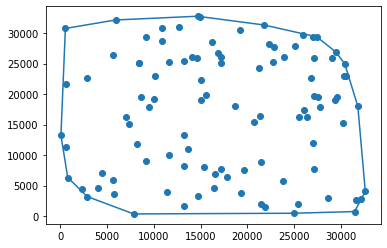

In [4]:
import matplotlib.pyplot as plt

# inputSet and outputSet should have been defined above. 
# uncomment the next two lines only if you wish to test the plotting code before coding your algorithm

#inputSet = [[1,1], [2,2] , [3, 3], [4,4], [1,4], [3,1], [1, 5], [2, 4], [3, 5]]
#outputSet = [[1,1], [3,1] , [4, 4], [3,5], [1,5]]

plt.figure()

#first do a scatter plot of the inputSet
input_xs, input_ys = zip(*inputSet)
plt.scatter(input_xs, input_ys)

#then do a polygon plot of the computed covex hull
outputSet.append(outputSet[0]) #first create a 'closed loop' by adding the first point at the end of the list
output_xs, output_ys = zip(*outputSet) 
plt.plot(output_xs, output_ys) 

plt.show() 